   TransactionID CustomerID  Age  Gender  TransactionAmount TransactionType  \
0              1       C001   28    Male                250      Withdrawal   
1              2       C002   45  Female               1500        Transfer   
2              3       C003   34    Male                800         Deposit   
3              4       C004   56  Female                300      Withdrawal   
4              5       C005   23    Male               2000        Transfer   

      Location TimeOfTransaction  IsFraudulent  
0     New York             14:05             0  
1      Chicago              9:15             1  
2  Los Angeles             17:20             0  
3       Boston             12:30             0  
4     New York             13:45             1  
Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.67      0.50      0.57         4

    accuracy                 

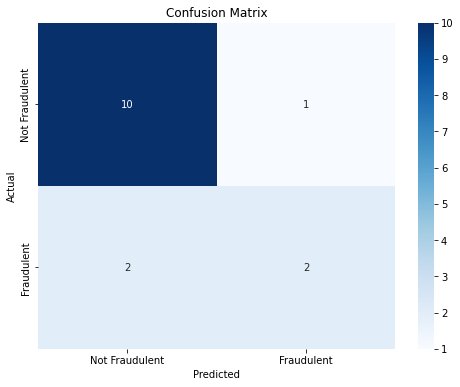

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('bank.csv')
print(df.head())


# Preprocessing
# Encoding categorical variables (Gender, TransactionType, Location)
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['TransactionType'] = le.fit_transform(df['TransactionType'])
df['Location'] = le.fit_transform(df['Location'])

# Splitting the dataset into features (X) and target (y)
X = df.drop(['TransactionID', 'CustomerID', 'IsFraudulent'], axis=1)  # Features
y = df['IsFraudulent']  # Target

# Scaling features (Only numerical data - no categorical data)
scaler = StandardScaler()

# Only scale the numerical columns
X_numerical = X[['Age', 'TransactionAmount']]  # Example of selecting numerical columns
X_scaled = scaler.fit_transform(X_numerical)

# Now, add the other non-numerical columns that are encoded (Gender, TransactionType, Location)
X_scaled = pd.DataFrame(X_scaled, columns=['Age', 'TransactionAmount'])
X_scaled['Gender'] = df['Gender']
X_scaled['TransactionType'] = df['TransactionType']
X_scaled['Location'] = df['Location']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraudulent', 'Fraudulent'], yticklabels=['Not Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

